## Homework 03: due 2022/04/20 23:59(100%)

### - Tutorial : 
___1. scipy.signal.convolve2d:___ https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

___2. OpenCV2 Convolution:___ https://blog.csdn.net/hysterisis/article/details/113097507

___3. cv2.filter2D:___ https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04 
                   
### - After you go through the tutorials, you should be able to work on this assignment.

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [4]:
import cv2
import os
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

#### 1. Please use the defined input matrix and the kernel below, and use the ___scipy.signal.convolve2d___ and ___cv2.filter2D___ to implement the convolution operation. The result output after convolution is given for your reference. (With half zero padding to make the shape fixed) (50%)

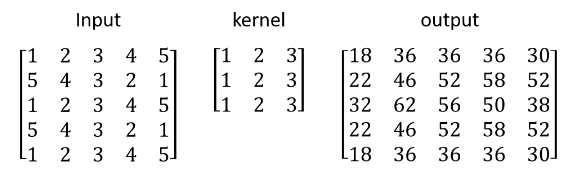

In [5]:
# Do not change this block
kernel = np.array([[1,2,3],
                  [1,2,3],
                  [1,2,3]])

input = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        if i%2 == 0:
            input[i][j] = j+1
        else:
            input[i][j] = 5-j

In [6]:
result =signal.convolve2d(input,kernel,boundary='fill',mode='same')
print(result)

[[18. 36. 36. 36. 30.]
 [22. 46. 52. 58. 52.]
 [32. 62. 56. 50. 38.]
 [22. 46. 52. 58. 52.]
 [18. 36. 36. 36. 30.]]


In [7]:
result = cv2.filter2D(src=input,ddepth=-1,anchor=(-1,-1),kernel=np.flip(kernel),borderType=cv2.BORDER_CONSTANT)
print(result)

[[18. 36. 36. 36. 30.]
 [22. 46. 52. 58. 52.]
 [32. 62. 56. 50. 38.]
 [22. 46. 52. 58. 52.]
 [18. 36. 36. 36. 30.]]


之前寫過的 以下改的不太順利...

In [8]:
def convolving (img ,k,padding=1):
    rowimg , colimg = img.shape
    rowk ,colk =k.shape
    xout =int((rowimg-rowk+2*padding)+1)
    yout =int((colimg-colk+2*padding)+1)
    Out = np.zeros((xout,yout))
    imagePadded = np.zeros((img.shape[0] + padding*2, img.shape[1] + padding*2))
    imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = img
    for x in range (rowimg):
        for y in range(colimg):
            # if rowimg- i- 1>= 0 and rowimg-i -1 <rowk and\
            #    colimg- j-1>= 0 and colimg -j-1 <colk:
                
                    Out[x,y] =(kernel* imagePadded[x:x+rowk, y:y+colk]).sum()
    print(Out)
    return 
    

In [9]:
convolving(input,np.flip(kernel))

[[30. 36. 36. 36. 18.]
 [38. 50. 56. 62. 32.]
 [52. 58. 52. 46. 22.]
 [38. 50. 56. 62. 32.]
 [30. 36. 36. 36. 18.]]


#### 2. Please do the convolution operation on your own image or on the give __test.jpg__. Using all the kernels below, and save each filtered image in ___.png___ file with the corresponding kernel names. Also, move all the filtered images to a folder. (50%)

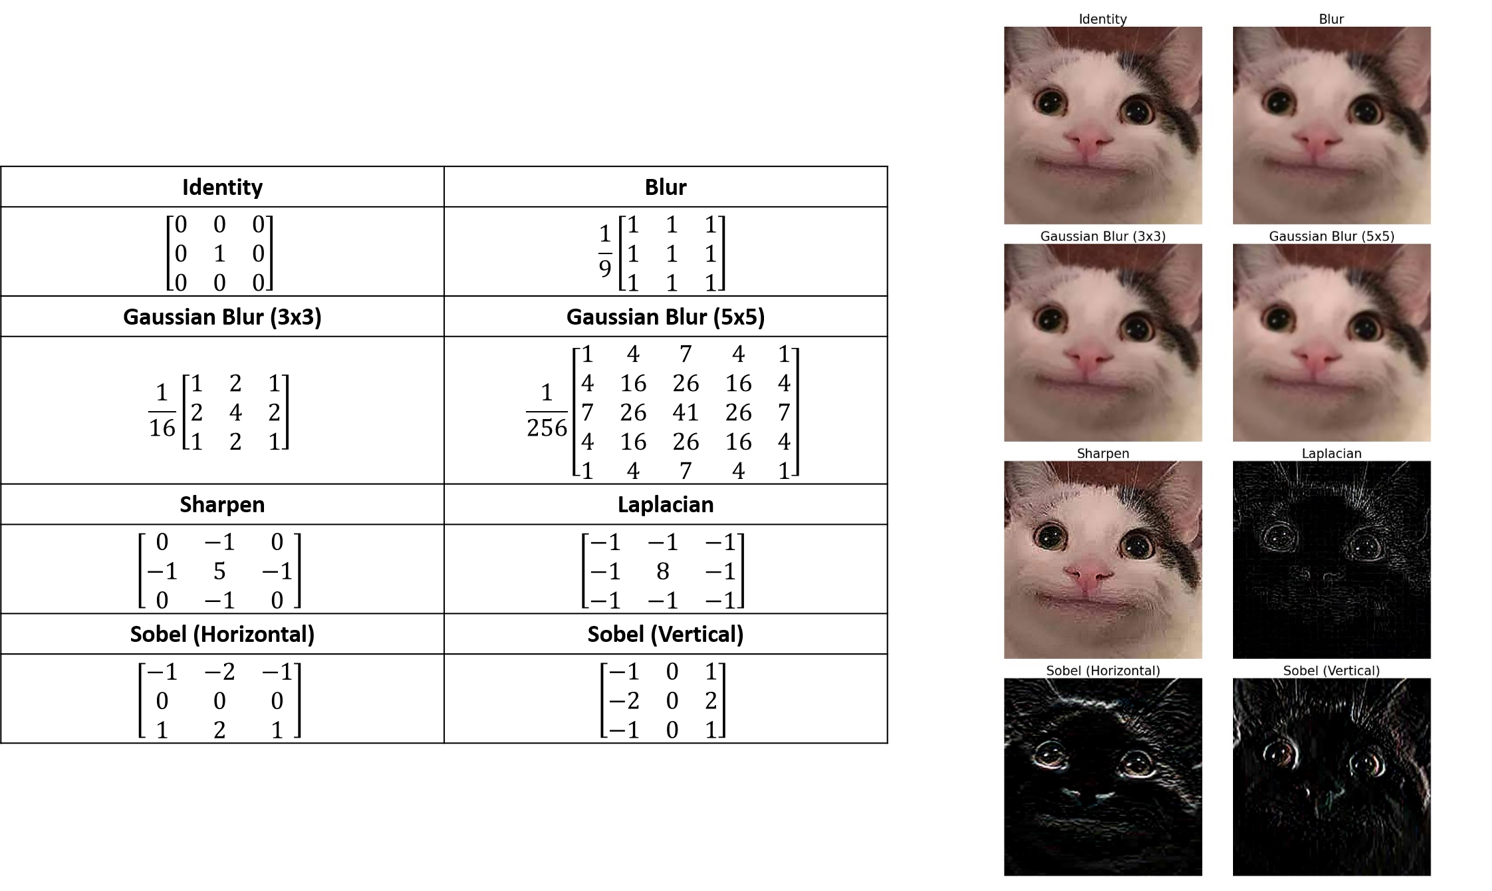

In [10]:
img = cv2.imread('piper_perri.png')

In [11]:
def Identity(img_in):
    kernel =np.array([[0,0,0],
                     [0,1,0],
                     [0,0,0]])
    result=np.zeros(img_in.shape)
    for i in range(3):
           result[:, :, i]= signal.convolve2d(img_in[:, :, i],kernel,boundary='fill',mode='same')
    cv2.imwrite('Identity.png',result)
    return
Identity(img)

In [12]:
def Blur(img_in):
    kernel =np.array([[1,1,1],
                     [1,1,1],
                     [1,1,1]])
    kernel = kernel/9
    result=np.zeros(img_in.shape)
    for i in range(3):
           result[:, :, i]= signal.convolve2d(img_in[:, :, i],kernel,boundary='fill',mode='same')
    cv2.imwrite('Blur.png',result)
    return
Blur(img)

In [13]:
def Gaussian3(img_in):
    kernel =np.array([[1,2,1],
                     [2,4,2],
                     [1,2,1]])
    kernel = kernel/16
    result=np.zeros(img_in.shape)
    for i in range(3):
           result[:, :, i]= signal.convolve2d(img_in[:, :, i],kernel,boundary='fill',mode='same')
    cv2.imwrite('Gaussian3.png',result)
    return
Gaussian3(img)

In [14]:
def Gaussian5(img_in):
    kernel =np.array([[1,4,7,4,1],
                     [4,16,26,16,4],
                     [7,26,41,26,7],
                     [4,16,26,16,4],
                     [1,4,7,4,1]])
    kernel = kernel/256
    result=np.zeros(img_in.shape)
    for i in range(3):
           result[:, :, i]= signal.convolve2d(img_in[:, :, i],kernel,boundary='fill',mode='same')
    cv2.imwrite('Gaussian5.png',result)
    return
Gaussian5(img)

In [15]:
def Sharpen(img_in):
    kernel =np.array([[0,-1,0],
                     [-1,5,-1],
                     [0,-1,0]])
    kernel = kernel
    result=np.zeros(img_in.shape)
    for i in range(3):
           result[:, :, i]= signal.convolve2d(img_in[:, :, i],kernel,boundary='fill',mode='same')
    cv2.imwrite('Sharpen.png',result)
    return
Sharpen(img)

In [16]:
def Laplacian(img_in):
    kernel =np.array([[-1,-1,-1],
                     [-1,8,-1],
                     [-1,-1,-1]])
    kernel = kernel
    result=np.zeros(img_in.shape)
    for i in range(3):
           result[:, :, i]= signal.convolve2d(img_in[:, :, i],kernel,boundary='fill',mode='same')
    cv2.imwrite('Laplacian.png',result)
    return
Laplacian(img)

In [17]:
def SobelH(img_in):
    kernel =np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])
    kernel = kernel
    result=np.zeros(img_in.shape)
    for i in range(3):
           result[:, :, i]= signal.convolve2d(img_in[:, :, i],kernel,boundary='fill',mode='same')
    cv2.imwrite('SobelH.png',result)
    return
SobelH(img)

In [18]:
def SobelV(img_in):
    kernel =np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])
    kernel = kernel
    result=np.zeros(img_in.shape)
    for i in range(3):
           result[:, :, i]= signal.convolve2d(img_in[:, :, i],kernel,boundary='fill',mode='same')
    cv2.imwrite('SobelV.png',result)
    return
SobelV(img)

In [19]:
def SobelMix(img_in):
    kernel =np.array([[-1,0,1],
                     [-2,0,2],
                     [-1,0,1]])
    new1=np.zeros(img_in.shape)
    for i in range(3):
           new1[:, :, i]= signal.convolve2d(img_in[:, :, i],kernel,boundary='fill',mode='same')
    kernel =np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])
    new2=np.zeros(img_in.shape)
    for i in range(3):
           new2[:, :, i]= signal.convolve2d(img_in[:, :, i],kernel,boundary='fill',mode='same')
    C=np.zeros(img_in.shape)
    C = np.sqrt(new1**2+new2**2)
    
    cv2.imwrite('SobelMix.png',C)
    return
SobelMix(img)

之前其他課作業寫過 效率果然差很多 而且這是單通道的 就懶得改成RGB的了 反正這是Edge detector不影響


In [20]:
img = cv2.imread('piper_perri.png',2)

def convolving (img ,k):
    rowimg , colimg = img.shape
    rowk ,colk =k.shape
    convolving = 0
    for i in range (rowimg):
        for j in range(colimg):
            if rowimg- i- 1>= 0 and rowimg-i -1 <rowk and\
               colimg- j-1>= 0 and colimg -j-1 <colk:
                    convolving +=(img[i,j] *k[rowimg-i -1,colimg -j-1])
    return convolving


In [21]:

def Sobel(img):
    img = np.asarray(img)
    row ,col = img.shape
    kernel1 = np.array([[ -1,-2,-1],
                        [  0, 0, 0],
                        [  1, 2, 1]])
    kernel2 = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])
    new1 = np.zeros(img.shape,dtype=int)
    new2 = np.zeros(img.shape,dtype=int)
    for i in range(row):
        for j in range(col):
            new1[i,j] = convolving(img[i:i+3,j:j+3], kernel1)
            new2[i,j] = convolving(img[i:i+3,j:j+3], kernel2)
    C = np.sqrt(new1**2+new2**2)
    
    return C
                        

cv2.imwrite('test.bmp', Sobel(img))

True